In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Hannanum

def get_wordCloud(strList):
    """
    Make WordCloud
    여러개의 문자열로 이루어진 리스트를 인자로 받는다.
    만들어진 img를 리턴한다.
    """
    # 하나의 문자열로 만들어주는 작업
    longStr = ""
    for str in strList:
        longStr += str

    # 형태소 분석 및 카운터
    hannanum = Hannanum()
    titleNouns = hannanum.nouns(longStr)
    titleCounter = Counter(titleNouns)

    wordcloud = WordCloud(
        font_path ="./malgun.ttf",
        width=1000,
        height=400,
        max_words=100,
        prefer_horizontal=1,
        max_font_size=200,
    )

    img = wordcloud.generate_from_frequencies(titleCounter)
    return img

In [4]:
import pandas as pd
import csv

def read_csv_and_sortBy(filePath, sortBy):
    """
    csv 파일을 읽어와서 특정 속성으로 정렬하는 함수
    """
    
    with open(filePath, 'r', encoding='utf-8-sig') as f:
        reader = csv.DictReader(f)

        sortedList = sorted(reader, key=lambda row: int(row[sortBy]) if row[sortBy].isdigit() else 0, reverse=True)

    return sortedList

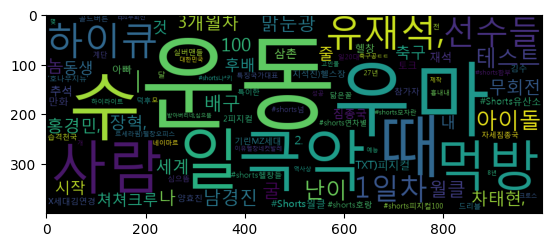

In [54]:
# 각 카테고리별 조회수 특히 높은 상위 100개 제목 WordCloud 만들고 저장
category_nameList = ['ANIMAL', 'GAME', 'MOVIE', 'MUKBANG', 'SPORTS']

for category_name in category_nameList:
    sortedList = read_csv_and_sortBy('{}_CHANNEL_VIDEO_INFO.csv'.format(category_name), '조회수')
    TitleList = []
    # 상위 100개에서 비디오 영상제목뽑아내기
    for videoInfo in sortedList[:100]:
        TitleList.append(videoInfo['영상제목'])
    img = get_wordCloud(TitleList)
    plt.imshow(img)
    plt.savefig('{}_CHANNEL_TOPVIEW_WORDCLOUD.png'.format(category_name))

In [ ]:
# 각 유튜버별 조회수 특히 높은 상위 10개 제목 WordCloud
